# STEAM VIDEO GAMES RECOMMENDATION SYSTEM

we need to recommend the similar games to the user based on their behaviour

#About dataset
This dataset is a list of user behaviors, with columns: user-id, game-title, behavior-name, value. The behaviors included are 'purchase' and 'play'. The value indicates the degree to which the behavior was performed - in the case of 'purchase' the value is always 1, and in the case of 'play' the value represents the number of hours the user has played the game.

steam-200k - (199999, 5)

# Columns in dataset
user-id

game-title

behavior-name

value

0

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [1]:
#importing necessary libraries
#importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from tqdm import tqdm

from sklearn.metrics.pairwise import cosine_similarity

In [2]:
# Read csv file using pandas
all_data = pd.read_csv("steam-200k.csv", header = None)
all_data.head()


,0,1,2,3,4
0,151603712,The Elder Scrolls V Skyrim,purchase,1.0,0
1,151603712,The Elder Scrolls V Skyrim,play,273.0,0
2,151603712,Fallout 4,purchase,1.0,0
3,151603712,Fallout 4,play,87.0,0
4,151603712,Spore,purchase,1.0,0


# EDA

In [3]:
# remane the column name as games user_id, hoursplay and status
all_data.columns = ["User_ID", "games", "Status", "Hoursplay", "0"]
all_data.head()

,User_ID,games,Status,Hoursplay,0
0,151603712,The Elder Scrolls V Skyrim,purchase,1.0,0
1,151603712,The Elder Scrolls V Skyrim,play,273.0,0
2,151603712,Fallout 4,purchase,1.0,0
3,151603712,Fallout 4,play,87.0,0
4,151603712,Spore,purchase,1.0,0


In [4]:
#drop 0 column
all_data.drop("0", axis = 1, inplace = True)


In [5]:
all_data.head()

,User_ID,games,Status,Hoursplay
0,151603712,The Elder Scrolls V Skyrim,purchase,1.0
1,151603712,The Elder Scrolls V Skyrim,play,273.0
2,151603712,Fallout 4,purchase,1.0
3,151603712,Fallout 4,play,87.0
4,151603712,Spore,purchase,1.0


In [6]:
#drop duplicate user_id and games keep the last one
all_data = all_data.drop_duplicates(["User_ID", "games"], keep = "last")

In [7]:
#check the shape of the dataset
all_data.shape

(128804, 4)

In [8]:
#check columns of the dataset
all_data.columns

Index(['User_ID', 'games', 'Status', 'Hoursplay'], dtype='object')

In [9]:
# Check which columns are having categorical, numerical or boolean values of dataset
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 128804 entries, 1 to 199999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   User_ID    128804 non-null  int64  
 1   games      128804 non-null  object 
 2   Status     128804 non-null  object 
 3   Hoursplay  128804 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.9+ MB


In [10]:
# Check for missing values in all the columnns of the train_dataset
all_data.isnull().sum()

User_ID      0
games        0
Status       0
Hoursplay    0
dtype: int64

In [11]:
# get how many unique values are in games column of dataset
all_data["games"].value_counts()

Dota 2                             4841
Team Fortress 2                    2323
Unturned                           1563
Counter-Strike Global Offensive    1412
Half-Life 2 Lost Coast              981
                                   ... 
Rebuild 3 Gangs of Deadsville         1
Order of War Challenge                1
Hero of Many                          1
Kohan Immortal Sovereigns             1
Trouble In The Manor                  1
Name: games, Length: 5155, dtype: int64

In [12]:
# get the total count of play and total count of purchase
total_purchase = all_data.groupby("Status")["Status"].agg("count")
total_purchase

Status
play        70205
purchase    58599
Name: Status, dtype: int64

In [13]:
# For more information on the dataset like the total count in all the columns
# min, max values and more information of the respective columns  
all_data.describe()

,User_ID,Hoursplay
count,1.288040e+05,128804.000000
mean,1.025343e+08,27.150648
std,7.242875e+07,171.276192
min,5.250000e+03,0.100000
25%,4.559264e+07,1.000000
50%,8.605570e+07,1.000000
75%,1.542307e+08,5.700000
max,3.099031e+08,11754.000000


## visualizing data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021D415527C8>]],
      dtype=object)

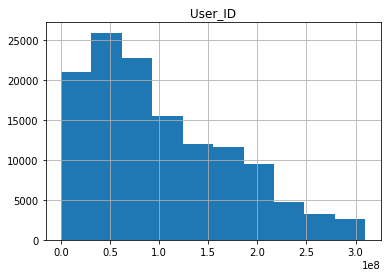

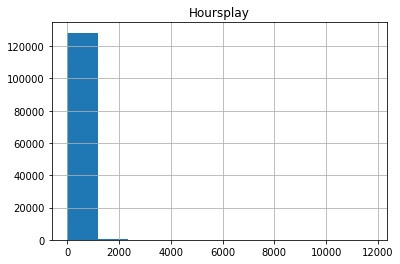

In [14]:
# Histogram using pandas 
all_data.hist(["User_ID"])
all_data.hist("Hoursplay")

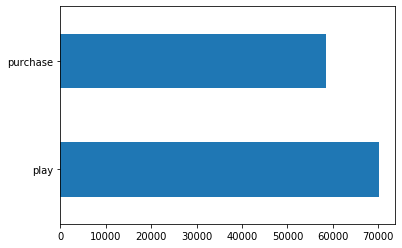

In [15]:
# plot a horizontal bar plot of column status
all_data["Status"].value_counts().plot.barh()

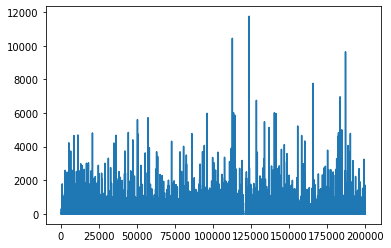

In [16]:
#plot a count plot of hoursplay column
all_data["Hoursplay"].plot()

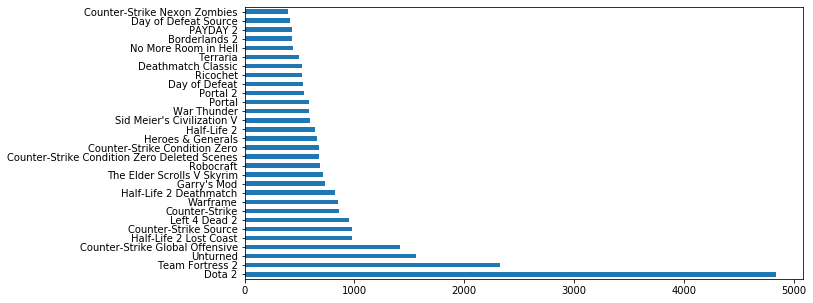

In [17]:
# plot a horizontal bar plot of games column for top 30 games
all_data["games"].value_counts()[:30].plot(kind = "barh", figsize = (10, 5))

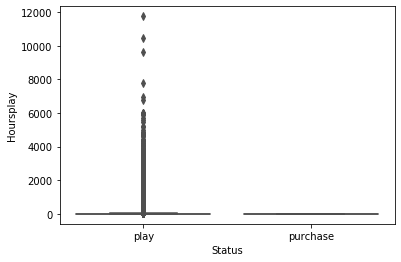

In [19]:
# plot a boxplot of status as x-axis and hoursplay as y-axis
sns.boxplot(x = "Status", y = "Hoursplay", data = all_data, palette = "rainbow")

# converting hours to rating

In [20]:
# comvert the hoursplay into rating
all_data = all_data[(all_data["Status"] == "play") & (all_data["Hoursplay"] >= 2)]
all_data.head()

,User_ID,games,Status,Hoursplay
1,151603712,The Elder Scrolls V Skyrim,play,273.0
3,151603712,Fallout 4,play,87.0
5,151603712,Spore,play,14.9
7,151603712,Fallout New Vegas,play,12.1
9,151603712,Left 4 Dead 2,play,8.9


In [33]:
# df_play_filtered = df[()]
df_play_filtered = all_data[all_data.groupby("games").User_ID.transform(len) >= 20]


In [34]:
df_play_filtered["games"].nunique()

427

In [35]:
df_play_filtered["User_ID"] = df_play_filtered["User_ID"].astype(str)

In [38]:
averages = df_play_filtered.groupby("games", as_index = False).Hoursplay.mean()
averages["average_Hoursplay"] = averages["Hoursplay"]

averages.drop("Hoursplay", axis = 1, inplace = True)


In [40]:
averages.head()

,games,average_Hoursplay
0,7 Days to Die,50.777500
1,APB Reloaded,113.377778
2,ARK Survival Evolved,105.982813
3,Ace of Spades,10.971739
4,AdVenture Capitalist,67.760674


In [41]:
final_ratings = pd.merge(df_play_filtered, averages, on = "games")
final_ratings

,User_ID,games,Status,Hoursplay,average_Hoursplay
0,151603712,The Elder Scrolls V Skyrim,play,273.0,115.351792
1,59945701,The Elder Scrolls V Skyrim,play,58.0,115.351792
2,92107940,The Elder Scrolls V Skyrim,play,110.0,115.351792
3,250006052,The Elder Scrolls V Skyrim,play,465.0,115.351792
4,11373749,The Elder Scrolls V Skyrim,play,220.0,115.351792
...,...,...,...,...,...
36415,51822361,"Warhammer 40,000 Dawn of War Soulstorm",play,23.0,14.109091
36416,38317154,"Warhammer 40,000 Dawn of War Soulstorm",play,5.5,14.109091
36417,36404933,"Warhammer 40,000 Dawn of War Soulstorm",play,5.8,14.109091
36418,87201181,"Warhammer 40,000 Dawn of War Soulstorm",play,24.0,14.109091


In [42]:
conditions = [(final_ratings["Hoursplay"] >= (0.8 * final_ratings["average_Hoursplay"])),
              (final_ratings["Hoursplay"] >= (0.6 * final_ratings["average_Hoursplay"])) & (final_ratings["Hoursplay"] < (0.8 * final_ratings["average_Hoursplay"])), 
              (final_ratings["Hoursplay"] >= (0.4 * final_ratings["average_Hoursplay"])) & (final_ratings["Hoursplay"] < (0.6 * final_ratings["average_Hoursplay"])), 
              (final_ratings["Hoursplay"] >= (0.2 * final_ratings["average_Hoursplay"])) & (final_ratings["Hoursplay"] < (0.4 * final_ratings["average_Hoursplay"])), 
              (final_ratings["Hoursplay"] >= 0) ]

In [43]:
ratings = [5, 4, 3, 2, 1]
final_ratings["rating"] = np.select(conditions, ratings)

In [44]:
final_ratings.head()

,User_ID,games,Status,Hoursplay,average_Hoursplay,rating
0,151603712,The Elder Scrolls V Skyrim,play,273.0,115.351792,5
1,59945701,The Elder Scrolls V Skyrim,play,58.0,115.351792,3
2,92107940,The Elder Scrolls V Skyrim,play,110.0,115.351792,5
3,250006052,The Elder Scrolls V Skyrim,play,465.0,115.351792,5
4,11373749,The Elder Scrolls V Skyrim,play,220.0,115.351792,5


In [ ]:
# keep only important columns( user_id, games,rating ) drop everthing else 
final_ratings.drop(["Status", "Hoursplay", "average_Hoursplay"], axis = 1, inplace = True)

In [ ]:
final_ratings.head()

,User_ID,games,rating
0,151603712,The Elder Scrolls V Skyrim,5
1,59945701,The Elder Scrolls V Skyrim,3
2,92107940,The Elder Scrolls V Skyrim,5
3,250006052,The Elder Scrolls V Skyrim,5
4,11373749,The Elder Scrolls V Skyrim,5


# MEMORY BASED COLLABORATIVE FILTERING

Memory-based algorithms approach the collaborative filtering problem by using the entire database.It tries to find users that are similar to the active user (i.e. the users we want to make predictions for), and uses their preferences to predict ratings for the active user.

In [ ]:
#import pairwise_distances, cosine, corelation
from sklearn.metrics.pairwise import pairwise_distances
from scipy.spatial.distance import cosine, correlation

In [ ]:
# create pivot table containing user_id as index, games as columns, ratings as values
piv = final_ratings.pivot_table(index = ["User_ID"], columns = ["games"], values = "rating")

In [ ]:
#check shape of pivot table
print(piv.shape)
#check first five rows of pivot table
piv.head()

(8309, 427)


games,7 Days to Die,APB Reloaded,ARK Survival Evolved,Ace of Spades,AdVenture Capitalist,Aftermath,Age of Chivalry,Age of Empires II HD Edition,Age of Empires III Complete Collection,Age of Mythology Extended Edition,...,"Warhammer 40,000 Dawn of War II - Chaos Rising","Warhammer 40,000 Space Marine",Wasteland 2,Watch_Dogs,Wolfenstein The New Order,Worms Reloaded,Worms Revolution,XCOM Enemy Unknown,Zombie Panic Source,theHunter
User_ID,,,,,,,,,,,,,,,,,,,,,
100053304,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100057229,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100070732,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100096071,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100168166,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
## Note: As we are subtracting the mean from each rating to standardize
##all users with only one rating or who had rated everything the same will be dropped
# Normalize the values in pivot table
piv_norm = piv.apply(lambda x: (x-np.mean(x)) / (np.max(x) - np.min(x)), axis = 1)
piv_norm = piv_norm.fillna(0)



In [ ]:
# Drop all columns containing only zeros representing users who did not rate
piv_norm = piv_norm.T
piv_norm = piv_norm.loc[:, (piv_norm != 0).any(axis= 0)]

In [ ]:
# import scipy, operator
import scipy as sp
import operator 

In [ ]:
# convert the data into sparse matrix format to be read by the following functions

piv_parse = sp.sparse.csr_matrix(piv_norm.values)

In [ ]:
piv_parse

<427x3056 sparse matrix of type '<class 'numpy.float64'>'
	with 30298 stored elements in Compressed Sparse Row format>

In [ ]:
# create matrices to show the computed cosine similarity values between each user/user array pair and item/item array pair.
item_similarity = cosine_similarity(piv_parse)
user_similarity = cosine_similarity(piv_parse.T)


In [ ]:
# Inserting the similarity matricies into dataframe objects

#item similarity dataframe
item_sim_df = pd.DataFrame(item_similarity, index = piv_norm.index, columns = piv_norm.index)
#user similarity dataframe
user_sim_df = pd.DataFrame(user_similarity, index = piv_norm.columns, columns = piv_norm.columns)

In [ ]:
# write a function which will return the top 10 games with the highest cosine similarity value

def top_game(game):
  count = 1
  print("Similar games to {} include:\n".format(game))
  for item in item_sim_df.sort_values(by = game, ascending = False).index[1:11]:
    print("No. {}: {}".format(count, item))
    count = count +1 



In [ ]:
top_game("Aftermath")

Similar games to Aftermath include:

No. 1: Alice Madness Returns
No. 2: Shadow Warrior
No. 3: Brtal Legend
No. 4: Resident Evil 5 / Biohazard 5
No. 5: Infestation Survivor Stories
No. 6: Call of Juarez Gunslinger
No. 7: The Walking Dead Season Two
No. 8: Counter-Strike Nexon Zombies
No. 9: Star Conflict
No. 10: L.A. Noire


In [ ]:
# check the column of pivot table
piv_norm.columns

Index(['100057229', '100096071', '100311267', '100322840', '100351493',
       '100359523', '100431715', '100444456', '100519466', '100630947',
       ...
       '994489', '9946133', '99484728', '99640715', '99704390', '99711581',
       '99713453', '99723205', '99766416', '99802512'],
      dtype='object', name='User_ID', length=3056)

In [ ]:
# write a function which will return the top 5 users with the highest similarity value 

def top_user(user):

  if user not in piv_norm.columns:
    return("No Data")
  print("Most similar users:\n")  
  sim_values = user_sim_df.sort_values(by = user, ascending = False).loc[:, user].tolist()[1:11]
  sim_users = user_sim_df.sort_values(by = user, ascending = False).index[1:11]
  zipped = zip(sim_users, sim_values,)
  for user, sim in zipped:
    print("User {0}, Similarity value: {1:.2f}".format(user, sim))



In [ ]:
top_user("99484728")

Most similar users:

User 40289887, Similarity value: 0.73
User 185494712, Similarity value: 0.71
User 16710264, Similarity value: 0.71
User 20566124, Similarity value: 0.67
User 49769103, Similarity value: 0.67
User 15702351, Similarity value: 0.65
User 161139120, Similarity value: 0.59
User 202057920, Similarity value: 0.58
User 57271785, Similarity value: 0.58
User 33993318, Similarity value: 0.58


In [ ]:
# write a function which constructs a list of lists containing the highest rated games per similar user
# and returns the name of the game along with the frequency it appears in the list
def similar_user_recs(user):

  if user not in piv_norm.columns:
    return ("No data available on user {}".format(user))
  sim_users = user_sim_df.sort_values(by = user, ascending = False).index[1: 11]
  best = []
  most_common = {}
  for i in sim_users:
    max_score = piv_norm.loc[:, i].max()
    best.append(piv_norm[piv_norm.loc[:, i] == max_score].index.tolist())
  for i in range(len(best)):
    for j in best[i]:
      if j in most_common:
        most_common[j] += 1
      else:
        most_common[j] = 1
  sorted_list = sorted(most_common.items(), key = operator.itemgetter(1), reverse = True)
  return sorted_list[:5]            


In [ ]:
similar_user_recs("100519466")


[('Robocraft', 6),
 ('BLOCKADE 3D', 2),
 ("Garry's Mod", 2),
 ('ARK Survival Evolved', 1),
 ('Dino D-Day', 1)]

# COLLABORATIVE FILTERING USING KNN

Collaborative Filtering Using k-Nearest Neighbors (kNN). kNN is a machine learning algorithm to find clusters of similar users based on common ratings, and make predictions using the average rating of top-k nearest neighbors.

https://datascienceplus.com/building-a-book-recommender-system-the-basics-knn-and-matrix-factorization/

In [ ]:
# import NearestNeighbors
from sklearn.neighbors import NearestNeighbors

#make an object for the NearestNeighbors Class.
model_knn = NearestNeighbors(metric = "cosine", algorithm = "brute", n_neighbors = 20, n_jobs = -1)

# fit the dataset
model_knn.fit(piv_norm)

NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1, n_neighbors=20)


Test model and make some recommendations:

In [ ]:
# choose random game
query_index = np.random.choice(piv_norm.shape[0])

# print the name of random game
print("Choosen game is : ", piv_norm.index[query_index])

# use kNN algorithm to measures distance to determine the closeness of instances.
distances, indices = model_knn.kneighbors(piv_norm.iloc[query_index, :].values.reshape(1, -1), n_neighbors= 6)

# pick most popular games among the neighbors and print their names
for i in range(0, len(distances.flatten())):
  if i == 0:
    print("Recommendations for {}:\n".format(piv_norm.index[query_index]))
  else:
    print('{}: {}, with distances of {}: '.format(i, piv_norm.index[indices.flatten()[i]], distances.flatten()[i]))

Choosen game is :  South Park The Stick of Truth
Recommendations for South Park The Stick of Truth:

1: Far Cry 3, with distances of 0.8963763352067543: 
2: BioShock 2, with distances of 0.9140509463274928: 
3: Saints Row The Third, with distances of 0.9161963448224122: 
4: Far Cry 3 Blood Dragon, with distances of 0.9177895274635886: 
5: BioShock Infinite, with distances of 0.9181856845060751: 


#Conclusion

We can use different different methods based on our problem statement and dataset. Here we used collaborative filtering technique to recommend games.We can use this method to recommend alot of other things as well such as music, movies, books, news etc. 

#Congratulation for completing the assignment.
You have learned a lot while doing this assignment.

